# Penerapan Algoritma K-Means Untuk Segmentasi Customer Menggunakan Python



In [28]:
from k_means import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Simple Customer Segmentation
Import data CSV dalam folder dataset

In [20]:
df = pd.read_csv('Dataset/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Inisialisasi data berdasarkan Annual Income, serta Spending Score

In [21]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Text(0, 0.5, 'Spending Score (1-100)')

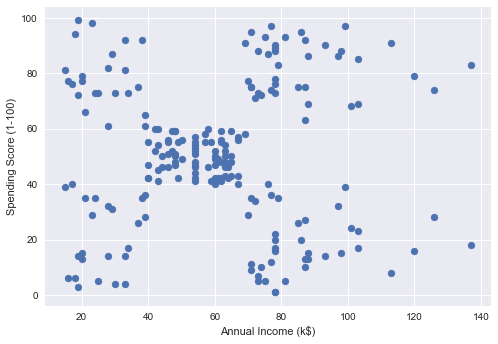

In [22]:
plt.close()
plt.style.use('seaborn')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

Lakukan pemodelan dengan algoritma Kmeans yang sudah di buat

In [23]:
model = KMeans(max_iter = 500, tolerance = 0.001, n_clusters = 5, runs = 100)
(clusters, data_with_clusters) = model.fit(X)

In [24]:
model.cost_

2602.972578838644

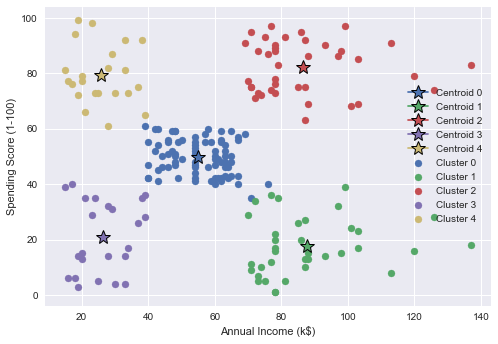

In [25]:
plt.close()
for i, cluster_mean in enumerate(clusters):
    data_cluster_i = data_with_clusters[ data_with_clusters[:, -1] == i ]
    plt.scatter(data_cluster_i[:, 0], data_cluster_i[:, 1], label = 'Cluster ' + str(i))
    plt.plot(cluster_mean[0], cluster_mean[1], label = 'Centroid ' + str(i), marker='*', markersize=15, markeredgecolor="k", markeredgewidth=1)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.style.use('seaborn')
    plt.legend()

## Searching for optimum K by Elbow Method
Kami menggunakan Elbow Method  dalam Cluster Sum Of Squares (WCSS) melawan
jumlah cluster (Nilai K) untuk mengetahui jumlah nilai cluster yang optimal.

In [26]:
def elbow_method(X, max_k = 10):
    costs = []
    for k in range(2, max_k):
        model = KMeans(n_clusters=k, init_method='var_part')
        model.fit(X)
        costs.append(model.cost_)
    plt.close()
    plt.plot(list(range(2, max_k)), costs)
    plt.xlabel("# of clusters (K)")
    plt.ylabel("Cost")

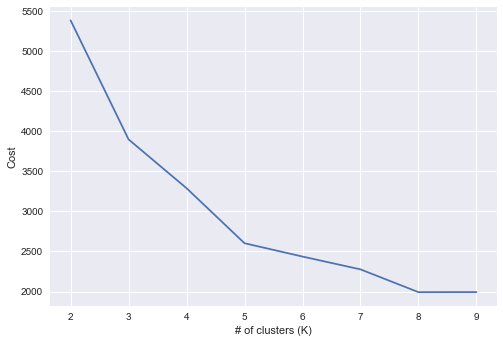

In [27]:
elbow_method(X)

Jelas, bahwa jumlah cluster yang optimal untuk data kami adalah 5, sebagai kemiringan kurva
Ketika kita mengamati kurva ini, kita melihat bahwa siku terakhir datang pada k = 5,
akan sulit untuk memvisualisasikan siku jika kita memilih rentang yang lebih tinggi